In [ ]:
## Install missingno, helps to visualise missing data in dataframe
!pip install missingno
!pip install fancyimpute

In [ ]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [ ]:
## Mount google drive to import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load Dataset from your main directory
dataset = pd.read_csv(r'/content/drive/My Drive/echocardiogram.csv') 

In [ ]:
print(dataset)

     survival  alive   age  pericardialeffusion  fractionalshortening    epss  \
0        11.0    0.0  71.0                  0.0                 0.260   9.000   
1        19.0    0.0  72.0                  0.0                 0.380   6.000   
2        16.0    0.0  55.0                  0.0                 0.260   4.000   
3        57.0    0.0  60.0                  0.0                 0.253  12.062   
4        19.0    1.0  57.0                  0.0                 0.160  22.000   
..        ...    ...   ...                  ...                   ...     ...   
128       7.5    1.0  64.0                  0.0                 0.240  12.900   
129      41.0    0.0  64.0                  0.0                 0.280   5.400   
130      36.0    0.0  69.0                  0.0                 0.200   7.000   
131      22.0    0.0  57.0                  0.0                 0.140  16.100   
132      20.0    0.0  62.0                  0.0                 0.150   0.000   

      lvdd  wallmotion-scor

In [ ]:
#remove non important columns from dataset, as specified in the dataset description
del dataset["name"]
del dataset["group"]
del dataset["mult"]
del dataset["wallmotion-score"]

In [ ]:
#show missing values
print(dataset.isnull().sum())
print(dataset.shape)

survival                 3
alive                    2
age                      7
pericardialeffusion      1
fractionalshortening     9
epss                    16
lvdd                    12
wallmotion-index         3
aliveat1                58
dtype: int64
(133, 9)


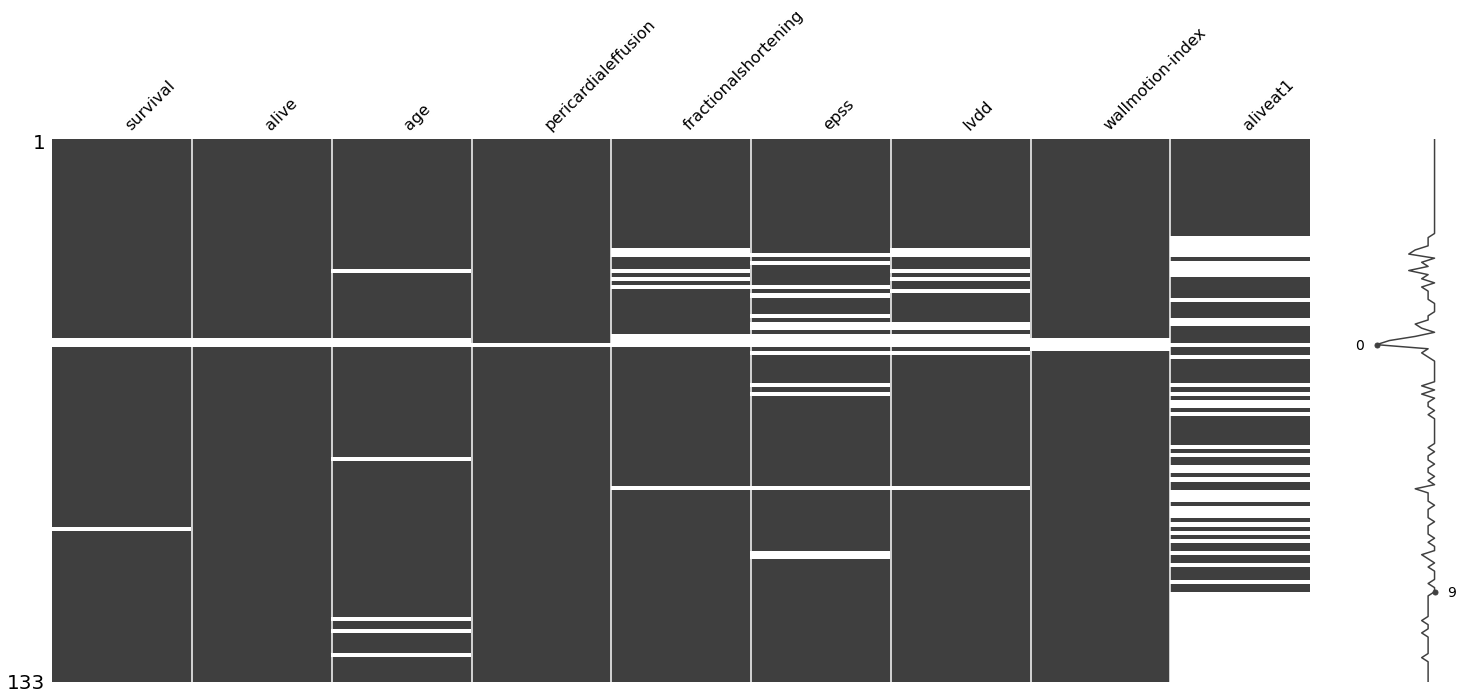

In [ ]:
#visualise missing values
msno.matrix(dataset)

In [ ]:
## Calculate missing values
from fancyimpute import KNN
dataset_knn=KNN(k=2).fit_transform(dataset)


Imputing row 1/133 with 0 missing, elapsed time: 0.032
Imputing row 101/133 with 0 missing, elapsed time: 0.036
[KNN] Warning: 9/1197 still missing after imputation, replacing with 0


In [ ]:
print(dataset_knn)

[[11.     0.    71.    ...  4.6    1.     0.   ]
 [19.     0.    72.    ...  4.1    1.7    0.   ]
 [16.     0.    55.    ...  3.42   1.     0.   ]
 ...
 [36.     0.    69.    ...  5.05   1.21   0.   ]
 [22.     0.    57.    ...  4.36   1.36   0.   ]
 [20.     0.    62.    ...  4.51   1.409  0.   ]]


In [ ]:
## Transform back
dataset_knn=pd.DataFrame(dataset_knn)
dataset_knn.columns=dataset.columns
dataset_knn.aliveat1 = dataset_knn.aliveat1.round()
#dataset_knn.loc[dataset_knn['Alive_at_1'] > 1, 'Alive_at_1'] = 1
print(dataset_knn)

     survival  alive   age  pericardialeffusion  fractionalshortening    epss  \
0        11.0    0.0  71.0                  0.0                 0.260   9.000   
1        19.0    0.0  72.0                  0.0                 0.380   6.000   
2        16.0    0.0  55.0                  0.0                 0.260   4.000   
3        57.0    0.0  60.0                  0.0                 0.253  12.062   
4        19.0    1.0  57.0                  0.0                 0.160  22.000   
..        ...    ...   ...                  ...                   ...     ...   
128       7.5    1.0  64.0                  0.0                 0.240  12.900   
129      41.0    0.0  64.0                  0.0                 0.280   5.400   
130      36.0    0.0  69.0                  0.0                 0.200   7.000   
131      22.0    0.0  57.0                  0.0                 0.140  16.100   
132      20.0    0.0  62.0                  0.0                 0.150   0.000   

      lvdd  wallmotion-inde

In [ ]:
#show missing values
print(dataset_knn.isnull().sum())
print(dataset_knn.shape)
#dataset_knn.to_csv(r'/content/drive/My Drive/knn.csv')

survival                0
alive                   0
age                     0
pericardialeffusion     0
fractionalshortening    0
epss                    0
lvdd                    0
wallmotion-index        0
aliveat1                0
dtype: int64
(133, 9)


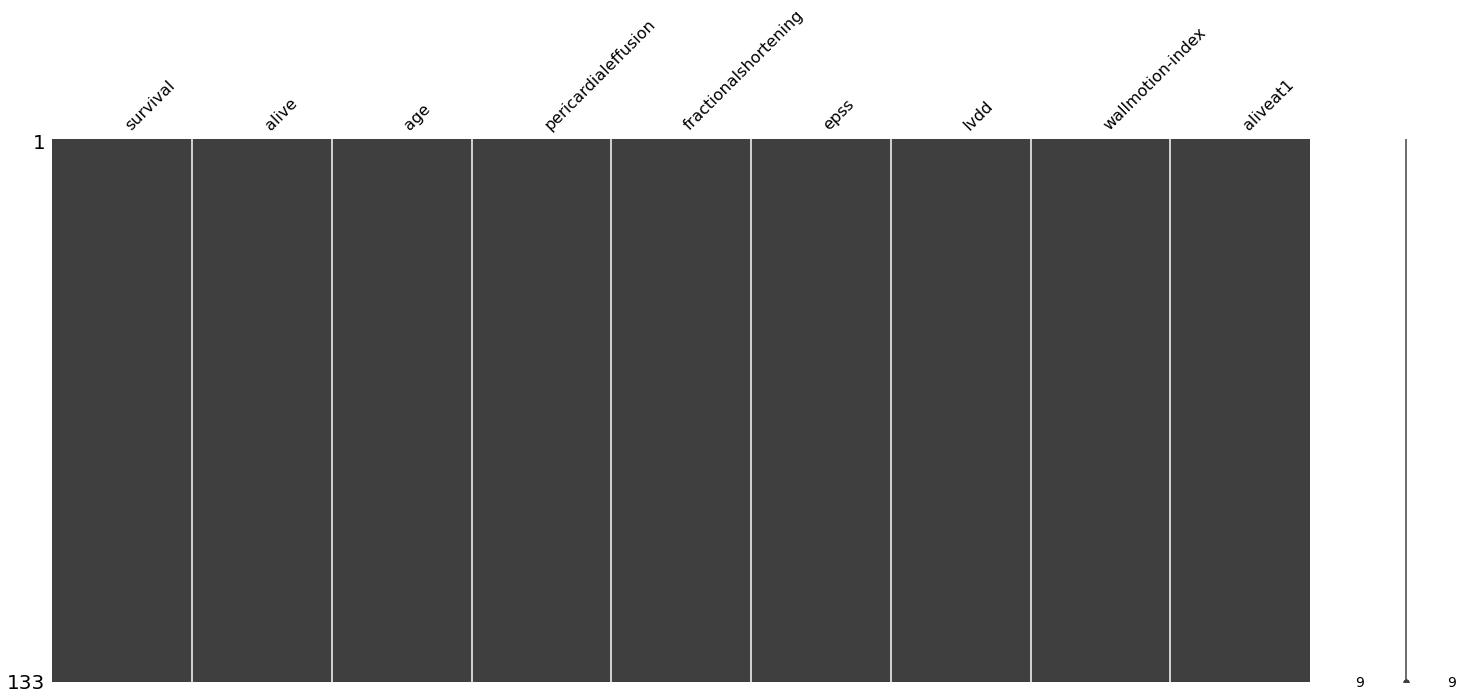

In [ ]:
#show missing values
msno.matrix(dataset_knn)

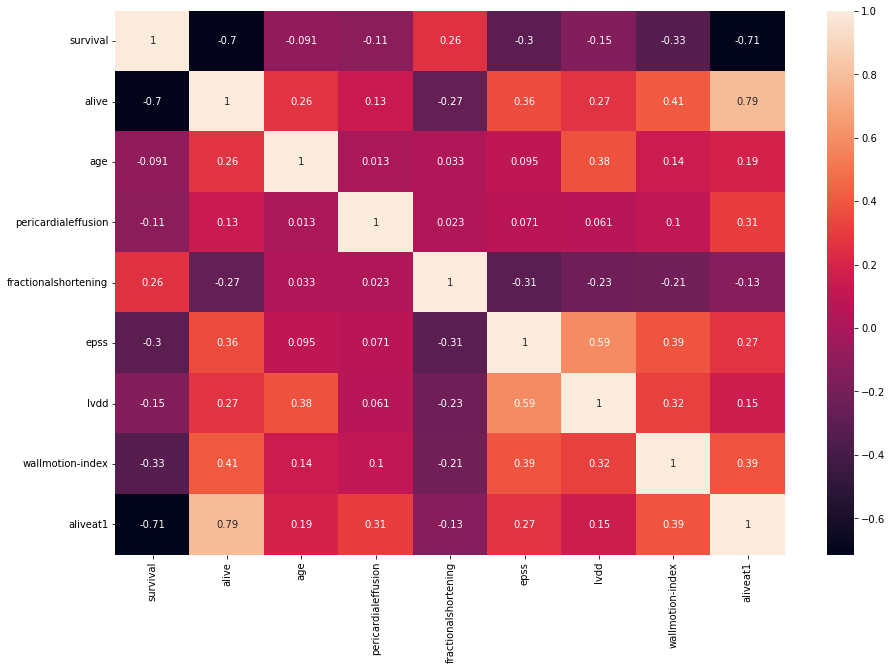

In [ ]:
#graph correlation
import seaborn as sns

correlation=dataset_knn.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation,annot=True)

In [ ]:
#normalize data 
column_names_to_normalize = ['survival', 'age_at_heart_attack', 'fractional_shortening', 'epss', 'lvdd', 'Wall_motion_score', 'Wall_motion_index']
dataset_knn[column_names_to_normalize] = dataset_knn[column_names_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
dataset_knn

,survival,still_alive,age_at_heart_attack,pericardial_effusion,fractional_shortening,epss,lvdd,Wall_motion_score,Wall_motion_index,Alive_at_1
0,0.192557,0.0,0.705882,0.0,0.416667,0.22500,0.511211,0.324324,0.0000,0.0
1,0.332982,0.0,0.725490,0.0,0.616667,0.15000,0.399103,0.324324,0.3500,0.0
2,0.280323,0.0,0.392157,0.0,0.416667,0.10000,0.246637,0.324324,0.0000,0.0
3,1.000000,0.0,0.490196,0.0,0.405000,0.30155,0.511883,0.378378,0.2250,0.0
4,0.332982,1.0,0.431373,0.0,0.250000,0.55000,0.769058,0.432432,0.6250,0.0
...,...,...,...,...,...,...,...,...,...,...
127,0.131122,1.0,0.568627,0.0,0.383333,0.32250,0.538117,0.270270,0.0000,0.0
128,0.719150,0.0,0.568627,0.0,0.450000,0.13500,0.706278,0.243243,0.0500,0.0
129,0.631385,0.0,0.666667,0.0,0.316667,0.17500,0.612108,0.337838,0.1050,0.0
130,0.385642,0.0,0.431373,0.0,0.216667,0.40250,0.457399,0.351351,0.1800,0.0


In [ ]:
# class distribution
print(dataset_knn.groupby('still_alive').size())


still_alive
0.0    88
1.0    44
dtype: int64


In [ ]:
## Save modified data set
dataset_knn.to_csv('echocardiogramKnnNorm.csv')
!cp echocardiogramKnnNorm.csv "/content/drive/My Drive/"

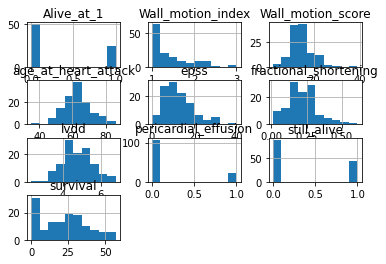

In [ ]:
# histograms
dataset.hist()
pyplot.show()

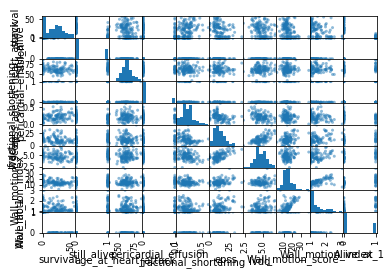

In [ ]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()